In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Carregar os dados
df = pd.read_csv("../data/commerce_dataset.csv", sep=";")

In [2]:
# ARIMA (AutoRegressive Integrated Moving Average): Este é um modelo clássico para análise de séries temporais que captura tanto a tendência quanto a sazonalidade nos dados.

# SARIMA (Seasonal AutoRegressive Integrated Moving Average): Este é uma extensão do ARIMA que também captura a sazonalidade nos dados.

# Prophet: Este é um modelo desenvolvido pelo Facebook que é especialmente bom para séries temporais com fortes componentes sazonais e feriados.

# LSTM (Long Short-Term Memory): Este é um tipo de rede neural recorrente que é capaz de aprender dependências de longo prazo, tornando-o adequado para previsão de séries temporais.

# Modelos de regressão com variáveis de tempo (como dia da semana, mês, trimestre, etc.): Esses modelos podem capturar tendências e padrões sazonais nos dados.

In [3]:
# # Convertendo a coluna 'dtme' para datetime
# df["dtme"] = pd.to_datetime(df["dtme"])

# # Agora você pode adicionar o Timedelta
# start_date = df["dtme"].max()  # Ajustado para ser a data máxima do DataFrame original
# end_date = start_date + pd.Timedelta(days=90)

# # Gerando datas aleatórias para as outras colunas
# dates = pd.Series(
#     np.random.choice(pd.date_range(start=start_date, end=end_date), size=90)
# )


# # Gerando valores aleatórios para as outras colunas
# new_data = {
#     "invoice_id": np.random.choice(df["invoice_id"].unique(), size=len(dates)),
#     "branch": np.random.choice(df["branch"].unique(), size=len(dates)),
#     "city": np.random.choice(df["city"].unique(), size=len(dates)),
#     "customer_type": np.random.choice(df["customer_type"].unique(), size=len(dates)),
#     "gender": np.random.choice(df["gender"].unique(), size=len(dates)),
#     "product_line": np.random.choice(df["product_line"].unique(), size=len(dates)),
#     "unit_price": np.random.uniform(
#         df["unit_price"].min(), df["unit_price"].max(), size=len(dates)
#     ),
#     "quantity": np.random.choice(df["quantity"].unique(), size=len(dates)),
#     "vat": np.random.uniform(df["vat"].min(), df["vat"].max(), size=len(dates)),
#     "total": np.random.uniform(df["total"].min(), df["total"].max(), size=len(dates)),
#     "dtme": dates,
#     "tme": np.random.choice(df["tme"].unique(), size=len(dates)),
#     "payment_method": np.random.choice(df["payment_method"].unique(), size=len(dates)),
#     "cogs": np.random.uniform(df["cogs"].min(), df["cogs"].max(), size=len(dates)),
#     "gross_margin_pct": np.random.uniform(
#         df["gross_margin_pct"].min(), df["gross_margin_pct"].max(), size=len(dates)
#     ),
#     "gross_income": np.random.uniform(
#         df["gross_income"].min(), df["gross_income"].max(), size=len(dates)
#     ),
#     "rating": np.random.uniform(
#         df["rating"].min(), df["rating"].max(), size=len(dates)
#     ),
#     "time_of_day": np.random.choice(df["time_of_day"].unique(), size=len(dates)),
#     "day_name": np.random.choice(df["day_name"].unique(), size=len(dates)),
#     "month_name": np.random.choice(df["month_name"].unique(), size=len(dates)),
#     # "day": np.random.choice(df["day"].unique(), size=len(dates)),  # Comentado pois a coluna 'day' não existe
# }

# # Criando um novo DataFrame com as novas datas e os valores gerados
# new_df = pd.DataFrame(new_data)

# # Concatenando o novo DataFrame com o DataFrame original
# df = pd.concat([df, new_df])

# # Resetando o índice
# df.reset_index(drop=True, inplace=True)

RMSE: 256.23501598398326


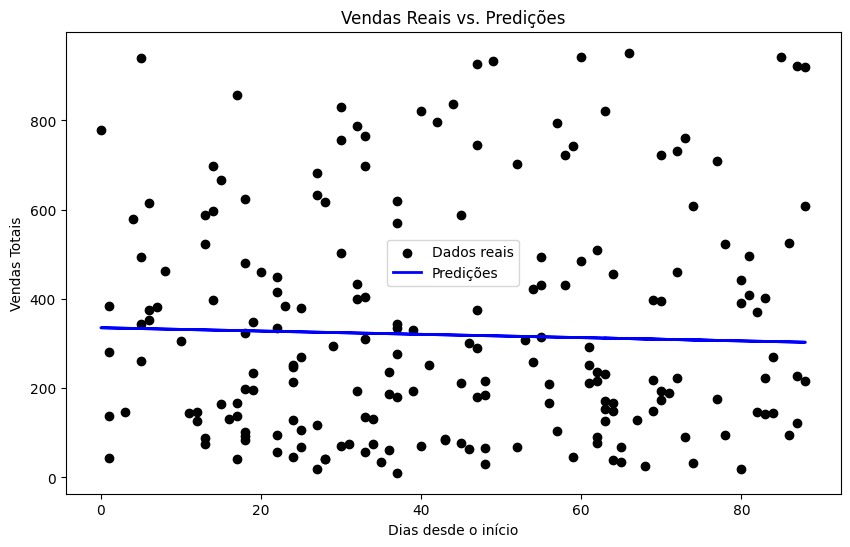

In [4]:
# Convertendo 'dtme' para datetime e criando uma coluna 'day' como variável independente
df["dtme"] = pd.to_datetime(df["dtme"])
df["day"] = (df["dtme"] - df["dtme"].min()).dt.days

# Preparando variáveis independentes (X) e dependente (y)
X = df[["day"]]  # Aqui você pode adicionar mais variáveis após a análise exploratória
y = df["total"]

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Criando e treinando o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Predições
predictions = model.predict(X_test)

# Avaliando o modelo
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

# Plotando os resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color="black", label="Dados reais")
plt.plot(X_test, predictions, color="blue", linewidth=2, label="Predições")
plt.xlabel("Dias desde o início")
plt.ylabel("Vendas Totais")
plt.title("Vendas Reais vs. Predições")
plt.legend()
plt.show()

Random Forest RMSE: 264.3428451458215


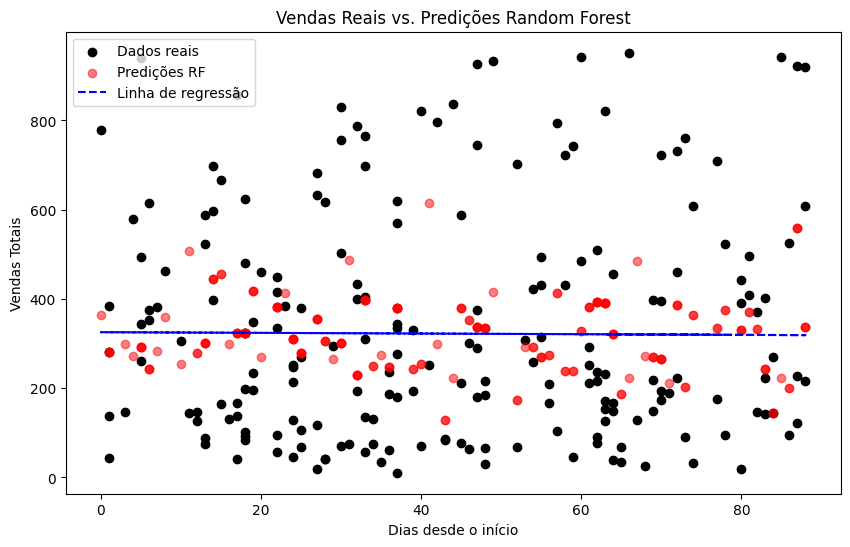

In [5]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Criando o modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Treinando o modelo
rf_model.fit(X_train, y_train)

# Fazendo predições
rf_predictions = rf_model.predict(X_test)

# Avaliando o modelo
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
print(f"Random Forest RMSE: {rf_rmse}")

# Plotando os resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color="black", label="Dados reais")
plt.scatter(X_test, rf_predictions, color="red", label="Predições RF", alpha=0.5)

# Adicionando a linha de regressão
z = np.polyfit(X_test.values.ravel(), rf_predictions, 1)
p = np.poly1d(z)
plt.plot(
    X_test.values.ravel(), p(X_test.values.ravel()), "b--", label="Linha de regressão"
)

plt.xlabel("Dias desde o início")
plt.ylabel("Vendas Totais")
plt.title("Vendas Reais vs. Predições Random Forest")
plt.legend()
plt.show()

In [6]:
import pandas as pd
# from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

# Convertendo a coluna 'dtme' para datetime
df['dtme'] = pd.to_datetime(df['dtme'])

# Definindo 'dtme' como o índice do DataFrame
df.set_index('dtme', inplace=True)

# Ordenando o DataFrame por 'dtme'
df.sort_index(inplace=True)

# Definindo a série temporal
ts = df['total']

# Dividindo os dados em treinamento e teste
size = int(len(ts) * 0.8)
train, test = ts[0:size], ts[size:len(ts)]

# Ajustando o modelo ARIMA
# model = ARIMA(train, order=(5,1,0))  # Você pode precisar ajustar os parâmetros (p,d,q)
model = sm.tsa.ARIMA(train, order=(5,1,0))  # Você pode precisar ajustar os parâmetros (p,d,q)
model_fit = model.fit()

# Fazendo previsões
start_index = len(train)
end_index = start_index + len(test) - 1
forecast, stderr, conf_int = model_fit.forecast(steps=len(test))

# Comparando previsões com valores reais
plt.plot(test.values)
plt.plot(forecast, color='red')
plt.show()

/home/kiwi/coding/PY-PROJECTS/Desafio-Grao/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/kiwi/coding/PY-PROJECTS/Desafio-Grao/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/kiwi/coding/PY-PROJECTS/Desafio-Grao/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/kiwi/coding/PY-PROJECTS/Desafio-Grao/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No su

ValueError: too many values to unpack (expected 3)

In [ ]:
# from prophet import Prophet

# # Preparando os dados para o Prophet
# # O Prophet requer que o dataframe tenha duas colunas: 'ds' para a data e 'y' para a variável que queremos prever
# df_prophet = df[["dtme", "total"]].rename(columns={"dtme": "ds", "total": "y"})

# # Converter 'ds' para o formato datetime
# df_prophet["ds"] = pd.to_datetime(df_prophet["ds"])

# # Inicializando e ajustando o modelo Prophet
# model = Prophet(daily_seasonality=True, yearly_seasonality=True)
# model.fit(df_prophet)

# # Criando um dataframe para as previsões futuras
# future = model.make_future_dataframe(periods=365)  # Previsão para os próximos 365 dias

# # Fazendo as previsões
# forecast = model.predict(future)

# # Visualizando as previsões
# fig1 = model.plot(forecast)
# fig2 = model.plot_components(forecast)

In [ ]:
# from prophet import Prophet

# # Preparando os dados para o Prophet
# # O Prophet requer que o dataframe tenha duas colunas: 'ds' para a data e 'y' para a variável que queremos prever
# df_prophet = df[["dtme", "total"]].rename(columns={"dtme": "ds", "total": "y"})

# # Converter 'ds' para o formato datetime
# df_prophet["ds"] = pd.to_datetime(df_prophet["ds"])

# # Inicializando e ajustando o modelo Prophet
# model = Prophet(daily_seasonality=True, yearly_seasonality=True)
# model.fit(df_prophet)

# # Criando um dataframe para as previsões futuras
# future = model.make_future_dataframe(periods=365)  # Previsão para os próximos 365 dias

# print(f"Tail do dataframe de previsões: {future.tail()}")

# # Fazendo as previsões
# forecast = model.predict(future)

# # Visualizando as previsões
# fig1 = model.plot(forecast)
# fig2 = model.plot_components(forecast)

In [ ]:
# Reimportando as bibliotecas necessárias após o reset do estado de execução do código
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Carregando o dataset novamente
# df = pd.read_csv('/mnt/data/commerce_dataset_clean.csv', sep=';')

# Preparando os dados com 'quantity' como variável independente e 'total' como dependente
X_ann_quantity = df["quantity"].values.reshape(-1, 1)
y_ann_total = df["total"].values

# Dividindo os dados em conjuntos de treinamento e teste
X_train_q, X_test_q, y_train_t, y_test_t = train_test_split(
    X_ann_quantity, y_ann_total, test_size=0.2, random_state=42
)

# Normalizando os dados de 'quantity'
scaler_q = StandardScaler()
X_train_scaled_q = scaler_q.fit_transform(X_train_q)
X_test_scaled_q = scaler_q.transform(X_test_q)

# Criando um novo modelo de rede neural com a configuração ajustada para o novo conjunto de dados
model_ann_qt = MLPRegressor(
    hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42
)

# Treinando o modelo com 'quantity' como entrada
model_ann_qt.fit(X_train_scaled_q, y_train_t)

# Fazendo previsões no conjunto de teste
y_pred_ann_qt = model_ann_qt.predict(X_test_scaled_q)

# Calculando o erro quadrático médio (MSE) para avaliar o desempenho
mse_ann_qt = mean_squared_error(y_test_t, y_pred_ann_qt)
print(f"MSE: {mse_ann_qt}")

# Plotando os resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_test_q, y_test_t, color="darkblue", label="Valores Reais")
plt.scatter(X_test_q, y_pred_ann_qt, color="orange", label="Previsões ANN", alpha=0.7)
plt.title("Redes Neurais Artificiais - Quantidade vs. Total das Vendas")
plt.xlabel("Quantidade")
plt.ylabel("Total das Vendas")
plt.legend()
plt.show()

In [ ]:
# Convertendo a coluna 'time' para o tipo datetime
df["dtme"] = pd.to_datetime(df["dtme"])

# Preparando os dados com 'time' como variável independente e 'total' como dependente
X_ann_time = df["dtme"].values.reshape(-1, 1)
y_ann_total = df["total"].values

# Dividindo os dados em conjuntos de treinamento e teste
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(
    X_ann_time, y_ann_total, test_size=0.2, random_state=42
)

# Normalizando os dados de 'time'
scaler_t = StandardScaler()
X_train_scaled_t = scaler_t.fit_transform(X_train_t)
X_test_scaled_t = scaler_t.transform(X_test_t)

# Criando um novo modelo de rede neural com a configuração ajustada para o novo conjunto de dados
model_ann_tt = MLPRegressor(
    hidden_layer_sizes=(100, 50),
    max_iter=1000,
    random_state=42,
    learning_rate_init=0.05,
    activation="tanh",
)

# Treinando o modelo com 'time' como entrada
model_ann_tt.fit(X_train_scaled_t, y_train_t)

# Fazendo previsões no conjunto de teste
y_pred_ann_tt = model_ann_tt.predict(X_test_scaled_t)

# Calculando o erro quadrático médio (MSE) para avaliar o desempenho
mse_ann_tt = mean_squared_error(y_test_t, y_pred_ann_tt)
print(f"MSE: {mse_ann_tt}")

# Plotando os resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_test_t, y_test_t, color="darkblue", label="Valores Reais")
plt.scatter(X_test_t, y_pred_ann_tt, color="orange", label="Previsões ANN", alpha=0.7)
plt.title("Redes Neurais Artificiais - Tempo vs. Total das Vendas")
plt.xlabel("Tempo")
plt.ylabel("Total das Vendas")
plt.legend()
plt.show()

In [ ]:
# ver as colunas do dataframe
print(df.columns)

In [ ]:
# Convertendo a coluna 'dtme' para o tipo datetime
df["dtme"] = pd.to_datetime(df["dtme"])

# Preparando os dados com 'dtme' como variável independente e 'total' como dependente
X_ann_time = df["dtme"].values.reshape(-1, 1)
y_ann_total = df["total"].values

# Dividindo os dados em conjuntos de treinamento e teste
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(
    X_ann_time, y_ann_total, test_size=0.2, random_state=42
)

# Normalizando os dados de 'dtme'
scaler_t = StandardScaler()
X_train_scaled_t = scaler_t.fit_transform(X_train_t)
X_test_scaled_t = scaler_t.transform(X_test_t)

# Criando um novo modelo de rede neural com a configuração ajustada para o novo conjunto de dados
model_ann_tt = MLPRegressor(
    hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42
)

# Treinando o modelo com 'dtme' como entrada
model_ann_tt.fit(X_train_scaled_t, y_train_t)

# Fazendo previsões no conjunto de teste
y_pred_ann_tt = model_ann_tt.predict(X_test_scaled_t)

# Calculando o erro quadrático médio (MSE) para avaliar o desempenho
mse_ann_tt = mean_squared_error(y_test_t, y_pred_ann_tt)
print(f"MSE: {mse_ann_tt}")

# Plotando os resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_test_t, y_test_t, color="darkblue", label="Valores Reais")
plt.scatter(X_test_t, y_pred_ann_tt, color="orange", label="Previsões ANN", alpha=0.7)
plt.title("Redes Neurais Artificiais - Tempo vs. Total das Vendas")
plt.xlabel("Tempo")
plt.ylabel("Total das Vendas")
plt.legend()
plt.show()

In [ ]:
# Convertendo as previsões para um DataFrame para facilitar a manipulação
df_pred = pd.DataFrame({"dtme": X_test_t.flatten(), "total": y_pred_ann_tt})

# Convertendo 'dtme' para o tipo datetime
df_pred["dtme"] = pd.to_datetime(df_pred["dtme"])

# Ordenando o DataFrame por 'dtme'
df_pred.sort_values("dtme", inplace=True)

# Plotando os resultados
plt.figure(figsize=(10, 6))
plt.plot(df_pred["dtme"], df_pred["total"], color="orange", label="Previsões ANN")
plt.scatter(X_test_t, y_test_t, color="darkblue", label="Valores Reais")
plt.title("Redes Neurais Artificiais - Tempo vs. Total das Vendas")
plt.xlabel("Tempo")
plt.ylabel("Total das Vendas")
plt.legend()
plt.show()

In [ ]:
import seaborn as sns

# Criando um novo DataFrame para os valores reais
df_real = pd.DataFrame({"dtme": X_test_t.flatten(), "total": y_test_t})

# Convertendo 'dtme' para o tipo datetime
df_real["dtme"] = pd.to_datetime(df_real["dtme"])

# Ordenando o DataFrame por 'dtme'
df_real.sort_values("dtme", inplace=True)

# Criando a figura e o eixo
fig, ax = plt.subplots(figsize=(10, 6))

# Plotando os pontos de previsões como "Xzinhos"
sns.scatterplot(
    x="dtme",
    y="total",
    data=df_pred,
    color="orange",
    label="Previsões ANN",
    ax=ax,
    marker="x",
)

# Plotando os pontos de valores reais
sns.scatterplot(
    x="dtme", y="total", data=df_real, color="darkblue", label="Valores Reais", ax=ax
)

# Configurando o título e os rótulos dos eixos
ax.set_title("Redes Neurais Artificiais - Tempo vs. Total das Vendas")
ax.set_xlabel("Tempo")
ax.set_ylabel("Total das Vendas")

# Mostrando a legenda
ax.legend()

# Mostrando o gráfico
plt.show()

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Convertendo a coluna 'dtme' para datetime
df['dtme'] = pd.to_datetime(df['dtme'])

# Definindo 'dtme' como o índice do DataFrame
df.set_index('dtme', inplace=True)

# Ordenando o DataFrame por 'dtme'
df.sort_index(inplace=True)

# Definindo a série temporal
ts = df['total']

# Dividindo os dados em treinamento e teste
size = int(len(ts) * 0.8)
train, test = ts[0:size], ts[size:len(ts)]

# Ajustando o modelo ARIMA
model = ARIMA(train, order=(5,1,0))  # Você pode precisar ajustar os parâmetros (p,d,q)
model_fit = model.fit(disp=0)

# Fazendo previsões
start_index = len(train)
end_index = start_index + len(test) - 1
forecast, stderr, conf_int = model_fit.forecast(steps=len(test))

# Comparando previsões com valores reais
plt.plot(test.values)
plt.plot(forecast, color='red')
plt.show()